# New Section

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [21]:
preprocessed_path = "/content/drive/MyDrive/Neural Network Soft Computing Assignment/combined_wine_dataset1.csv"
preprocessed_df = pd.read_csv(preprocessed_path)
# preprocessed_df

In [22]:
# Extract features and target variable
X = preprocessed_df.drop('Quality_Category_Encoded', axis=1)
y = preprocessed_df['Quality_Category_Encoded']


In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode target variables
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
def one_hot_encoding(labels, num_classes):
    one_hot_labels = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        one_hot_labels[i, label] = 1
    return one_hot_labels

num_classes = len(np.unique(y_train))
y_train_one_hot = one_hot_encoding(y_train, num_classes)
y_test_one_hot = one_hot_encoding(y_test, num_classes)

In [27]:
# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Ensure y_train has the correct shape
y_train = y_train.reshape(-1, 1)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = one_hot_encoding(y_train, num_classes)
y_test_one_hot = one_hot_encoding(y_test, num_classes)

In [28]:
# Define the neural network architecture
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(np.unique(y_train_encoded))


In [29]:
# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

In [30]:
# Define activation function (sigmoid for hidden layer, softmax for output layer)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [31]:
# Training the model
learning_rate = 0.01
epochs = 10000
training_losses = []
training_accuracies = []

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_probabilities = softmax(output_layer_input)

    # Compute loss
    loss = -np.mean(np.sum(y_train_one_hot * np.log(predicted_probabilities), axis=1))


    # Backward propagation
    d_output = predicted_probabilities.copy()
    d_output[range(len(y_train_encoded)), y_train_encoded] -= 1
    d_output /= len(y_train_encoded)

    d_hidden = np.dot(d_output, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, d_output)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

# Calculate training accuracy
    train_predictions = np.argmax(predicted_probabilities, axis=1)
    train_accuracy = np.mean(train_predictions == y_train)
    training_accuracies.append(train_accuracy)  # Append to the list

    # Print the loss for every 5 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

Epoch 1000/10000, Loss: 0.6768998432901264
Epoch 2000/10000, Loss: 0.5808398715555461
Epoch 3000/10000, Loss: 0.5569659440024448


KeyboardInterrupt: ignored

ValueError: ignored

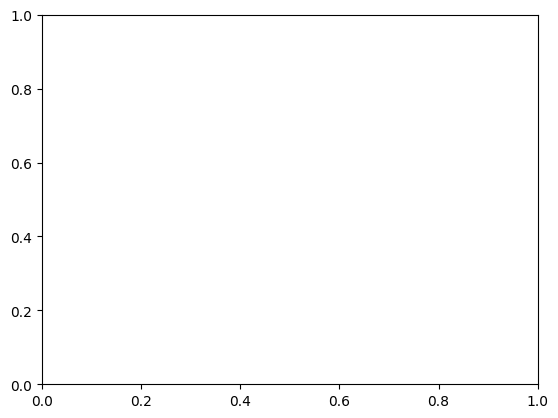

In [13]:
plt.plot(range(1, epochs+1), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# Testing the model
hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
predicted_probabilities_test = softmax(output_layer_input_test)

In [42]:
# Predicted class labels
predicted_labels_test = np.argmax(predicted_probabilities_test, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, predicted_labels_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 75.38%


In [45]:
# ... (inside the training loop)


# After training
plt.plot(range(1, epochs+1), training_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NameError: ignored